# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

In [2]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# view mouse meta data
mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [3]:
# view study_results
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [4]:
# Combine the data into a single dataset
study_df_complete = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

# Display the data table for preview
study_df_complete

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [5]:
# Checking the number of mice.
mouse_count = len(study_df_complete["Mouse ID"].unique())
mouse_count

249

In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_miceID = study_df_complete.loc[study_df_complete.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
duplicate_miceID

array(['g989'], dtype=object)

In [7]:
# Optional: Get all the data for the duplicate mouse ID. 
study_df_complete.loc[study_df_complete["Mouse ID"] == "g989"]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
study_df_clean = study_df_complete.drop_duplicates(subset=['Mouse ID'])
study_df_clean

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
245,t565,0,45.0,0,Capomulin,Female,20,17
246,i557,0,45.0,0,Capomulin,Female,1,24
247,m957,0,45.0,0,Capomulin,Female,3,19
248,f966,0,45.0,0,Capomulin,Male,16,17


In [9]:
# Checking the number of mice in the clean DataFrame.
mouse_count_clean = study_df_clean["Mouse ID"].nunique()
mouse_count_clean 



249

## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each 
# regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean = study_df_clean['Tumor Volume (mm3)'].groupby(study_df_clean['Drug Regimen']).mean()
median = study_df_clean['Tumor Volume (mm3)'].groupby(study_df_clean['Drug Regimen']).median()
var = study_df_clean['Tumor Volume (mm3)'].groupby(study_df_clean['Drug Regimen']).var()
std = study_df_clean['Tumor Volume (mm3)'].groupby(study_df_clean['Drug Regimen']).std()
sem = study_df_clean['Tumor Volume (mm3)'].groupby(study_df_clean['Drug Regimen']).sem()

# Assemble the resulting series into a single summary DataFrame.
summary_stat = pd.DataFrame({"Mean Tumor Volume":mean, 
                            "Median Tumor Volume":median, 
                           "Tumor Volume Variance":var, 
                           "Tumor Volume Std. Dev.":std, 
                           "Tumor Volume Std. Err.":sem})
summary_stat

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,45.0,45.0,0.0,0.0,0.0
Ceftamin,45.0,45.0,0.0,0.0,0.0
Infubinol,45.0,45.0,0.0,0.0,0.0
Ketapril,45.0,45.0,0.0,0.0,0.0
Naftisol,45.0,45.0,0.0,0.0,0.0
Placebo,45.0,45.0,0.0,0.0,0.0
Propriva,45.0,45.0,0.0,0.0,0.0
Ramicane,45.0,45.0,0.0,0.0,0.0
Stelasyn,45.0,45.0,0.0,0.0,0.0


In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
mean = study_df_clean['Tumor Volume (mm3)'].groupby(study_df_clean['Drug Regimen']).mean()
median = study_df_clean['Tumor Volume (mm3)'].groupby(study_df_clean['Drug Regimen']).median()
var = study_df_clean['Tumor Volume (mm3)'].groupby(study_df_clean['Drug Regimen']).var()
std = study_df_clean['Tumor Volume (mm3)'].groupby(study_df_clean['Drug Regimen']).std()
sem = study_df_clean['Tumor Volume (mm3)'].groupby(study_df_clean['Drug Regimen']).sem()

# Using the aggregation method, produce the same summary statistics in a single line.
summary_agg =  study_df_clean.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_agg

Tumor Volume (mm3)                      
                           mean median  var  std  sem
Drug Regimen                                         
Capomulin                  45.0   45.0  0.0  0.0  0.0
Ceftamin                   45.0   45.0  0.0  0.0  0.0
Infubinol                  45.0   45.0  0.0  0.0  0.0
Ketapril                   45.0   45.0  0.0  0.0  0.0
Naftisol                   45.0   45.0  0.0  0.0  0.0
Placebo                    45.0   45.0  0.0  0.0  0.0
Propriva                   45.0   45.0  0.0  0.0  0.0
Ramicane                   45.0   45.0  0.0  0.0  0.0
Stelasyn                   45.0   45.0  0.0  0.0  0.0
Zoniferol                  45.0   45.0  0.0  0.0  0.0

## Bar and Pie Charts

In [12]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
mice_count = study_df_clean["Drug Regimen"].value_counts()
mice_count

Capomulin    25
Ketapril     25
Naftisol     25
Infubinol    25
Ramicane     25
Propriva     25
Zoniferol    25
Placebo      25
Ceftamin     25
Stelasyn     24
Name: Drug Regimen, dtype: int64

Text(0.5, 1.0, 'Number of Timepoints per Treatment')

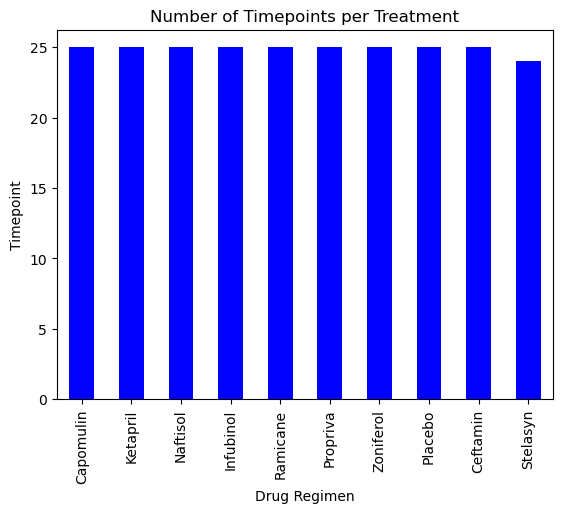

In [13]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
plot_pandas = mice_count.plot.bar(color='b')  
# Set the xlabel, ylabel, and title using class methods
plt.xlabel("Drug Regimen")
plt.ylabel("Timepoint")
plt.title("Number of Timepoints per Treatment")

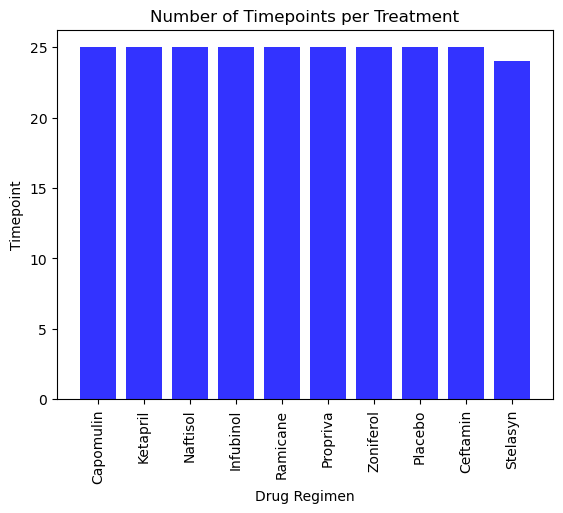

In [14]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = mice_count.index.values
y_axis = mice_count.values
plt.bar(x_axis, y_axis, color='b', alpha=0.8, align='center')
plt.title("Number of Timepoints per Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Timepoint")
plt.xticks(rotation="vertical")

plt.show()

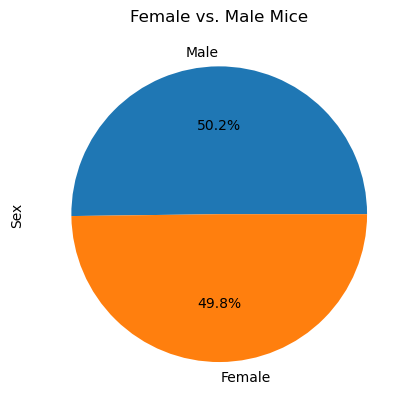

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_data = study_df_clean["Sex"].value_counts()
plt.title("Female vs. Male Mice")
gender_data.plot.pie(autopct= "%1.1f%%")
plt.show()


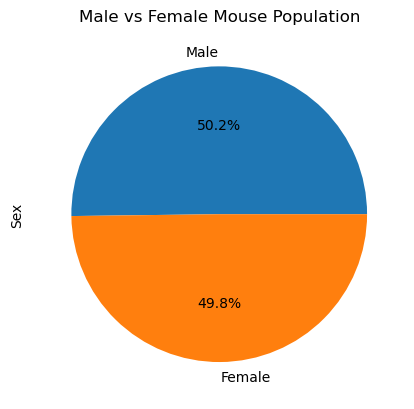

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Female', 'Male']
sizes = [49.7999197, 50.200803]
plot = gender_data.plot.pie(y='Total Count', autopct="%1.1f%%")
plt.title('Male vs Female Mouse Population')
plt.ylabel('Sex')
plt.show()


## Quartiles, Outliers and Boxplots

In [17]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
Capomulin_df = study_df_clean.loc[study_df_clean["Drug Regimen"] == "Capomulin",:]
Ramicane_df = study_df_clean.loc[study_df_clean["Drug Regimen"] == "Ramicane", :]
Infubinol_df = study_df_clean.loc[study_df_clean["Drug Regimen"] == "Infubinol", :]
Ceftamin_df = study_df_clean.loc[study_df_clean["Drug Regimen"] == "Ceftamin", :]

# Start by getting the last (greatest) timepoint for each mouse
Capomulin_last = Capomulin_df.groupby('Mouse ID').max()['Timepoint']
Capomulin_vol = pd.DataFrame(Capomulin_last)
Capomulin_merge = pd.merge(Capomulin_vol, study_df_clean, on=("Mouse ID","Timepoint"),how="left")
Capomulin_merge.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,b742,0,45.0,0,Capomulin,Male,7,21
2,f966,0,45.0,0,Capomulin,Male,16,17
3,g288,0,45.0,0,Capomulin,Male,3,19
4,g316,0,45.0,0,Capomulin,Female,22,22


In [18]:
# Start by getting the last (greatest) timepoint for each mouse
Ramicane_last = Ramicane_df.groupby('Mouse ID').max()['Timepoint']
Ramicane_vol = pd.DataFrame(Ramicane_last)
Ramicane_merge = pd.merge(Ramicane_vol, study_df_clean, on=("Mouse ID","Timepoint"),how="left")
Ramicane_merge.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a411,0,45.0,0,Ramicane,Male,3,22
1,a444,0,45.0,0,Ramicane,Female,10,25
2,a520,0,45.0,0,Ramicane,Male,13,21
3,a644,0,45.0,0,Ramicane,Female,7,17
4,c458,0,45.0,0,Ramicane,Female,23,20


In [19]:
# Start by getting the last (greatest) timepoint for each mouse
Infubinol_last = Infubinol_df.groupby('Mouse ID').max()['Timepoint']
Infubinol_vol = pd.DataFrame(Infubinol_last)
Infubinol_merge = pd.merge(Infubinol_vol, study_df_clean, on=("Mouse ID","Timepoint"),how="left")
Infubinol_merge.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,0,45.0,0,Infubinol,Female,20,23
1,a251,0,45.0,0,Infubinol,Female,21,25
2,a577,0,45.0,0,Infubinol,Female,6,25
3,a685,0,45.0,0,Infubinol,Male,8,30
4,c139,0,45.0,0,Infubinol,Male,11,28


In [20]:
# Start by getting the last (greatest) timepoint for each mouse
Ceftamin_last = Ceftamin_df.groupby('Mouse ID').max()['Timepoint']
Ceftamin_vol = pd.DataFrame(Ceftamin_last)
Ceftamin_merge = pd.merge(Ceftamin_vol, study_df_clean, on=("Mouse ID","Timepoint"),how="left")
Ceftamin_merge.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a275,0,45.0,0,Ceftamin,Female,20,28
1,b447,0,45.0,0,Ceftamin,Male,2,30
2,b487,0,45.0,0,Ceftamin,Female,6,28
3,b759,0,45.0,0,Ceftamin,Female,12,25
4,f436,0,45.0,0,Ceftamin,Female,3,25


In [21]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
Capomulin_last = Capomulin_df.groupby('Mouse ID').max()['Timepoint']
Capomulin_vol = pd.DataFrame(Capomulin_last)
Capomulin_merge = pd.merge(Capomulin_vol, study_df_clean, on=("Mouse ID","Timepoint"),how="left")
Capomulin_merge.head()
Capomulin_merge.to_csv("output.csv")
Capomulin_tumors = Capomulin_merge["Tumor Volume (mm3)"]

quartiles =Capomulin_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The lower quartile of Ramicane tumors is: {lowerq}")
print(f"The upper quartile of Ramicane tumors is: {upperq}")
print(f"The interquartile range of Ramicane tumors is: {iqr}")
print(f"The median of Ramicane tumors is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Ramicane tumors is: 45.0
The upper quartile of Ramicane tumors is: 45.0
The interquartile range of Ramicane tumors is: 0.0
The median of Ramicane tumors is: 45.0 
Values below 45.0 could be outliers.
Values above 45.0 could be outliers.


In [22]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
Ramicane_last = Ramicane_df.groupby('Mouse ID').max()['Timepoint']
Ramicane_vol = pd.DataFrame(Ramicane_last)
Ramicane_merge = pd.merge(Ramicane_vol, study_df_clean, on=("Mouse ID","Timepoint"),how="left")
Ramicane_merge.head()
Ramicane_merge.to_csv("output.csv")
Ramicane_tumors = Ramicane_merge["Tumor Volume (mm3)"]

quartiles =Ramicane_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The lower quartile of Ramicane tumors is: {lowerq}")
print(f"The upper quartile of Ramicane tumors is: {upperq}")
print(f"The interquartile range of Ramicane tumors is: {iqr}")
print(f"The median of Ramicane tumors is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Ramicane tumors is: 45.0
The upper quartile of Ramicane tumors is: 45.0
The interquartile range of Ramicane tumors is: 0.0
The median of Ramicane tumors is: 45.0 
Values below 45.0 could be outliers.
Values above 45.0 could be outliers.


In [23]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
Infubinol_last = Infubinol_df.groupby('Mouse ID').max()['Timepoint']
Infubinol_vol = pd.DataFrame(Infubinol_last)
Infubinol_merge = pd.merge(Infubinol_vol, study_df_clean, on=("Mouse ID","Timepoint"),how="left")
Infubinol_merge.head()
Infubinol_merge.to_csv("output.csv")
Infubinol_tumors = Infubinol_merge["Tumor Volume (mm3)"]

quartiles =Ramicane_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The lower quartile of Ramicane tumors is: {lowerq}")
print(f"The upper quartile of Ramicane tumors is: {upperq}")
print(f"The interquartile range of Ramicane tumors is: {iqr}")
print(f"The median of Ramicane tumors is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Ramicane tumors is: 45.0
The upper quartile of Ramicane tumors is: 45.0
The interquartile range of Ramicane tumors is: 0.0
The median of Ramicane tumors is: 45.0 
Values below 45.0 could be outliers.
Values above 45.0 could be outliers.


In [24]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
Ramicane_last = Ramicane_df.groupby('Mouse ID').max()['Timepoint']
Ramicane_vol = pd.DataFrame(Ramicane_last)
Ramicane_merge = pd.merge(Ramicane_vol, study_df_clean, on=("Mouse ID","Timepoint"),how="left")
Ramicane_merge.head()
Ramicane_merge.to_csv("output.csv")
Ramicane_tumors = Ramicane_merge["Tumor Volume (mm3)"]

quartiles =Ramicane_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The lower quartile of Ramicane tumors is: {lowerq}")
print(f"The upper quartile of Ramicane tumors is: {upperq}")
print(f"The interquartile range of Ramicane tumors is: {iqr}")
print(f"The median of Ramicane tumors is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Ramicane tumors is: 45.0
The upper quartile of Ramicane tumors is: 45.0
The interquartile range of Ramicane tumors is: 0.0
The median of Ramicane tumors is: 45.0 
Values below 45.0 could be outliers.
Values above 45.0 could be outliers.


In [25]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
Ceftamin_last = Ceftamin_df.groupby('Mouse ID').max()['Timepoint']
Ceftamin_vol = pd.DataFrame(Ceftamin_last)
Ceftamin_merge = pd.merge(Ceftamin_vol, study_df_clean, on=("Mouse ID","Timepoint"),how="left")
Ceftamin_merge.head()
Ceftamin_merge.to_csv("output.csv")
Ceftamin_tumors = Ceftamin_merge["Tumor Volume (mm3)"]

quartiles =Ceftamin_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The lower quartile of Ramicane tumors is: {lowerq}")
print(f"The upper quartile of Ramicane tumors is: {upperq}")
print(f"The interquartile range of Ramicane tumors is: {iqr}")
print(f"The median of Ramicane tumors is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Ramicane tumors is: 45.0
The upper quartile of Ramicane tumors is: 45.0
The interquartile range of Ramicane tumors is: 0.0
The median of Ramicane tumors is: 45.0 
Values below 45.0 could be outliers.
Values above 45.0 could be outliers.


In [28]:
drugs_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
drugs_list

['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

In [34]:
drugs = study_df_clean[study_df_clean["Drug Regimen"].isin(drugs_list)]
drugs.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
29,c326,0,45.0,0,Infubinol,Female,18,25
30,c139,0,45.0,0,Infubinol,Male,11,28
31,v339,0,45.0,0,Infubinol,Male,20,26
32,a577,0,45.0,0,Infubinol,Female,6,25


In [35]:
last_timepoint = drugs.groupby(["Drug Regimen", "Mouse ID"]).agg(tumor_size=("Tumor Volume (mm3)", lambda x: x.iloc[-1]))
last_timepoint = last_timepoint.stack(level=0).unstack(level=0)
for drug in drugs_list:
    print(drugs)

    Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0       b128          0                45.0                 0    Capomulin   
29      c326          0                45.0                 0    Infubinol   
30      c139          0                45.0                 0    Infubinol   
31      v339          0                45.0                 0    Infubinol   
32      a577          0                45.0                 0    Infubinol   
..       ...        ...                 ...               ...          ...   
245     t565          0                45.0                 0    Capomulin   
246     i557          0                45.0                 0    Capomulin   
247     m957          0                45.0                 0    Capomulin   
248     f966          0                45.0                 0    Capomulin   
249     m601          0                45.0                 0    Capomulin   

        Sex  Age_months  Weight (g)  
0    Female           9  

In [37]:
# Put treatments into a list for for loop (and later for plot labels)
treatment = 0
for drug in drugs_list:
    # Create empty list to fill with tumor vol data (for plotting)
    quartiles = last_timepoint[drug].quantile([.25,.5,.75]).round(2)
    lowerq = quartiles[0.5].round(2)
    upperq = quartiles[0.75].round(2)
    # Calculate the IQR and quantitatively determine if there are any potential outliers. 
    iqr = round(upperq-lowerq,2)
    lower_bound = round(lowerq - (1.5*iqr),2)
    upper_bound = round(upperq + (1.5*iqr),2)

    
# Locate the rows which contain mice on each drug and get the tumor volumes, add subset   
# Determine outliers using upper and lower bounds
    if treatment == 0:
        print(f"------------------------------------------------------------")
    print(f"The lower quartile of {drug} treatments is: {lowerq}")
    print(f"The upper quartile of {drug} treatments is: {upperq}")
    print(f"The interquartile range of {drug} treatments is: {iqr}")
    print(f"Values below {lower_bound} could be {drug} outliers.")
    print(f"Values above {upper_bound} could be {drug} outliers.")
    print(f"------------------------------------------------------------")
    treatment+=1

------------------------------------------------------------
The lower quartile of Capomulin treatments is: 45.0
The upper quartile of Capomulin treatments is: 45.0
The interquartile range of Capomulin treatments is: 0.0
Values below 45.0 could be Capomulin outliers.
Values above 45.0 could be Capomulin outliers.
------------------------------------------------------------
The lower quartile of Ramicane treatments is: 45.0
The upper quartile of Ramicane treatments is: 45.0
The interquartile range of Ramicane treatments is: 0.0
Values below 45.0 could be Ramicane outliers.
Values above 45.0 could be Ramicane outliers.
------------------------------------------------------------
The lower quartile of Infubinol treatments is: 45.0
The upper quartile of Infubinol treatments is: 45.0
The interquartile range of Infubinol treatments is: 0.0
Values below 45.0 could be Infubinol outliers.
Values above 45.0 could be Infubinol outliers.
------------------------------------------------------------

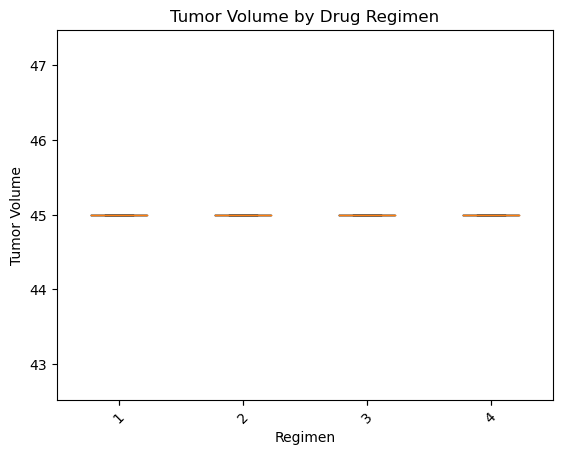

In [39]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
boxplot_list = []
for drug in drugs_list:
    boxplot_list.append(list(last_timepoint[drug].dropna()))
fig = plt.figure()
plt.xlabel("Regimen")
plt.xticks([1,2,3,4], drugs_list, rotation=45)
plt.ylabel("Tumor Volume")
plt.title("Tumor Volume by Drug Regimen")
plt.boxplot(boxplot_list)
plt.show()

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

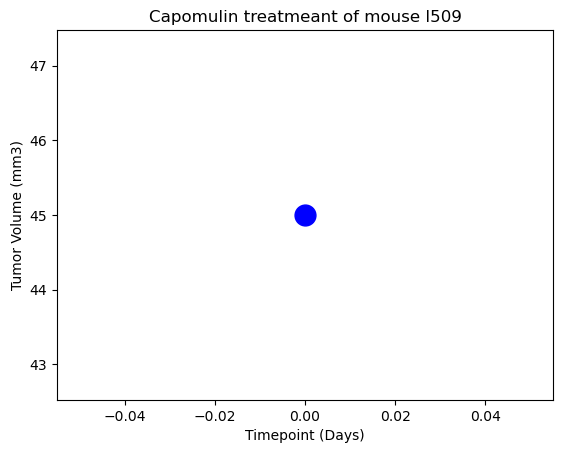

In [40]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
forline_df = Capomulin_df.loc[Capomulin_df["Mouse ID"] == "l509",:]
forline_df.head()
x_axis = forline_df["Timepoint"]
tumsiz = forline_df["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
plt.title('Capomulin treatmeant of mouse l509')
plt.plot(x_axis, tumsiz,linewidth=2, markersize=15,marker="o",color="blue", label="Fahreneit")
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

Text(0, 0.5, 'Averag Tumor Volume (mm3)')

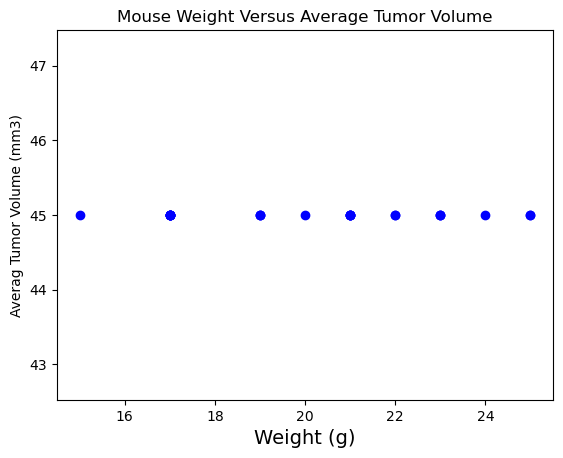

In [41]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
fig1, ax1 = plt.subplots()
avg_capm_vol =Capomulin_df.groupby(['Mouse ID']).mean()

marker_size=15
plt.scatter(avg_capm_vol['Weight (g)'],avg_capm_vol['Tumor Volume (mm3)'], color="blue")
plt.title('Mouse Weight Versus Average Tumor Volume')
plt.xlabel('Weight (g)',fontsize =14)
plt.ylabel('Averag Tumor Volume (mm3)')

## Correlation and Regression

In [44]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(avg_capm_vol['Weight (g)'],avg_capm_vol['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

The correlation between mouse weight and the average tumor volume is nan
